# Import Cells

In [134]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, scipy, sklearn
import seaborn as sns  # Seaborn, used for graphing 
from sklearn.metrics import classification_report

# Data Loading and Pre-Processing

In [135]:
# load data into dataframe using Pandas
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [136]:
# Drop the ticket, name, id columns - not relevant to final predictions
train_data = train_data.drop(['Ticket', 'Name'], axis=1)

# Encode the gender values to either 0 (male) or 1 (female)
train_data['Sex'] = train_data['Sex'].replace(['female', 'male'], [1, 0])

# Extract the labels now - remove ones that need to be removed later if needed
y = train_data[['PassengerId', 'Survived']]

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,71.2833,C85,C
2,3,1,3,1,26.0,0,0,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,53.1000,C123,S
4,5,0,3,0,35.0,0,0,8.0500,NaN,S


In [137]:
# Get basic statistical data about the data set
train_data.describe()
avg_age = train_data['Age'].mean()

In [138]:
# Split the data into positive/negative classes (survived vs not survived)
positive = train_data[train_data['Survived'] == 1]
negative = train_data[train_data['Survived'] != 1]

Text(0.5, 1.0, 'Ratio of Survivors (1) vs Deaths (0) in Data')

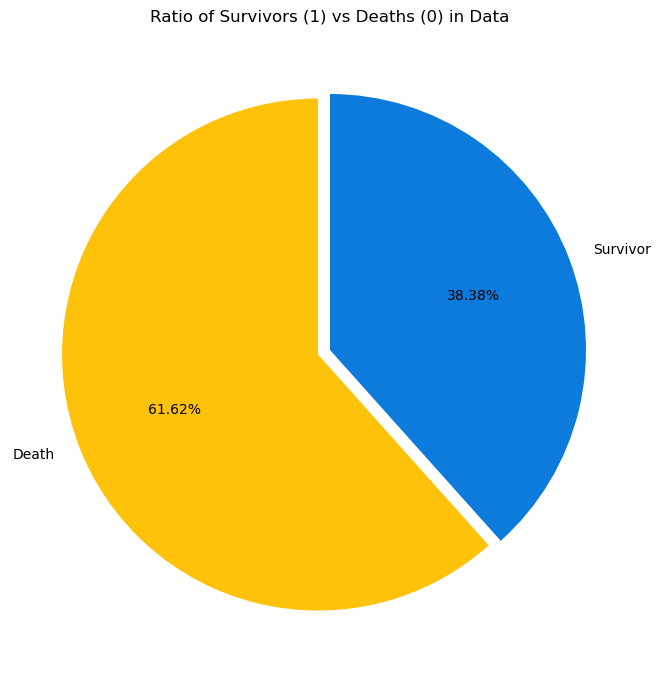

In [139]:
# Create a pie chart showing the disparity between positive (survived) and negative (died) classes
total_cases = train_data['Survived'].size
pos_cases = positive.size
neg_cases = negative.size

pos_ratio = pos_cases/total_cases
neg_ratio = neg_cases/total_cases

chart_sizes = [neg_ratio, pos_ratio]

# Try to choose colors that are accessable to all. Link below explains.
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
pie_colors = ['#FFC20A', '#0C7BDC']

# Set size of chart
pie_chart = plt.figure(figsize = (8,8))
pie_chart = pie_chart.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['Death', 'Survivor'] # Pie Chart labels for the classes 
explode = (0.05, 0) # Makes one of the wedges of the chart "stand out"


pies = pie_chart.pie(chart_sizes, explode = explode, labels = labels, colors = pie_colors, autopct = '%1.2f%%', 
                     shadow=False, startangle = 90)

# Add title to chart
plt.title('Ratio of Survivors (1) vs Deaths (0) in Data')

In [140]:
# Lets do some analysis of women vs men survival rates
women_data = train_data[train_data['Sex'] == 1]
men_data = train_data[train_data['Sex'] == 0]

data_list = [women_data, men_data]

In [141]:
# Let's see the average of men vs women survival rates
# Closer to 1 means that, on average, a group tended to survive more
avg_list = []

for df in data_list:
    avg_list.append(df['Survived'].mean())
    
res_dict = {'women': avg_list[0], 
             'men': avg_list[1]}

Text(0.5, 1.0, 'Survival Rates of the Titanic with relation to Sex')

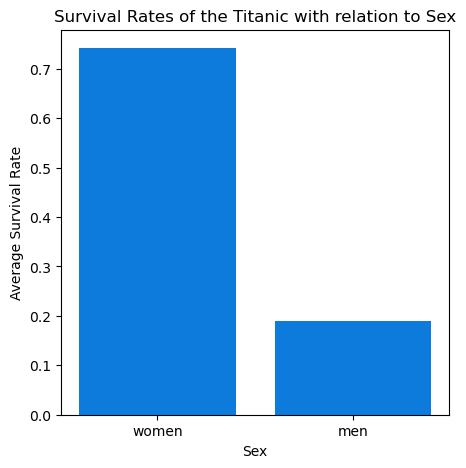

In [142]:
# Make a bar chart that shows the results of the basic analysis
x_axis = list(res_dict.keys())
y_axis = list(res_dict.values())

fig = plt.figure(figsize = (5,5))

plt.bar(x_axis, y_axis, color='#0C7BDC')
plt.xlabel('Sex')
plt.ylabel('Average Survival Rate')
plt.title('Survival Rates of the Titanic with relation to Sex')

Number of Women: 314
Number of Men: 577


Text(0.5, 1.0, 'Ratio of Women vs Men in the Data')

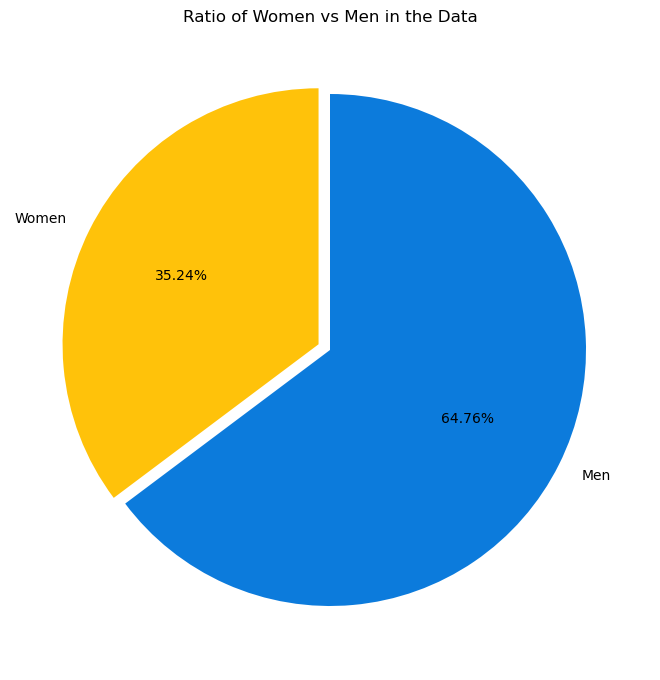

In [143]:
# Women tended to survive much more often than men. Let's get a visual breakdown of men vs women in the training data.
num_women = len(women_data['Sex'])
num_men = len(men_data['Sex'])

# Double check that the chart is properly labelled
print('Number of Women: ' + str(len(women_data['Sex'])))
print('Number of Men: ' + str(len(men_data['Sex'])))

women_ratio = num_women/total_cases
men_ratio = num_men/total_cases

chart_sizes = [women_ratio, men_ratio]

# Try to choose colors that are accessable to all. Link below explains.
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
pie_colors = ['#FFC20A', '#0C7BDC']

# Set size of chart
pie_chart_sex = plt.figure(figsize = (8,8))
pie_chart_sex = pie_chart_sex.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['Women', 'Men'] # Pie Chart labels for the classes 
explode = (0.05, 0) # Makes one of the wedges of the chart "stand out"


pies = pie_chart_sex.pie(chart_sizes, explode = explode, labels = labels, colors = pie_colors, autopct = '%1.2f%%', 
                     shadow=False, startangle = 90)

# Add title to chart
plt.title('Ratio of Women vs Men in the Data')

In [144]:
# Check and see which columns contain empty or null values
positive.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             52
SibSp            0
Parch            0
Fare             0
Cabin          206
Embarked         2
dtype: int64

In [145]:
# Lets see which passenger Id's are missing the 'Embarked' data point
empty_embarked = positive[positive['Embarked'].isnull()]
# These will need to be removed - luckily there are only 2 items that are missing the 'Embarked' trait
items_to_remove = list(empty_embarked['PassengerId'])

In [146]:
negative.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            125
SibSp            0
Parch            0
Fare             0
Cabin          481
Embarked         0
dtype: int64

In [147]:
# As it turns out, most of the data belonging to what cabin people were in is not provided. Drop the column.
# ~77% of the data does not contain data for the field. Cannot be deemed relevant in this case. 
no_cabin = negative.isna().sum()['Cabin'] + positive.isna().sum()['Cabin']
no_cabin_ratio = no_cabin/total_cases
print('Percent of cases missing Cabin data: {}%'.format(round(no_cabin_ratio, 5)))

train_data = train_data.drop(['Cabin'], axis=1)

Percent of cases missing Cabin data: 0.77104%


In [148]:
# Get the number of unique values for the Embarked column - this could likely be encoded into a numerical value
print(train_data['Embarked'].unique())
print(train_data['Embarked'].value_counts())

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [149]:
# Most of the data points (sans 2) have a value for this - it is likely significant
# Encode the chars into categoric numerical values
# One-hot encoding would prevent the issue of apparent ordering (1 < 2 < 3) in non-ordered data but I'm lazy
train_data['Embarked'] = train_data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

# Imputation of Missing Values

In [150]:
# Attempt to estimate the missing ages by using correlated data to predict
# First do basic correlation analysis to see what may be relevant in prediction
corr = train_data.corr(method='pearson', numeric_only=True)
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


<AxesSubplot:>

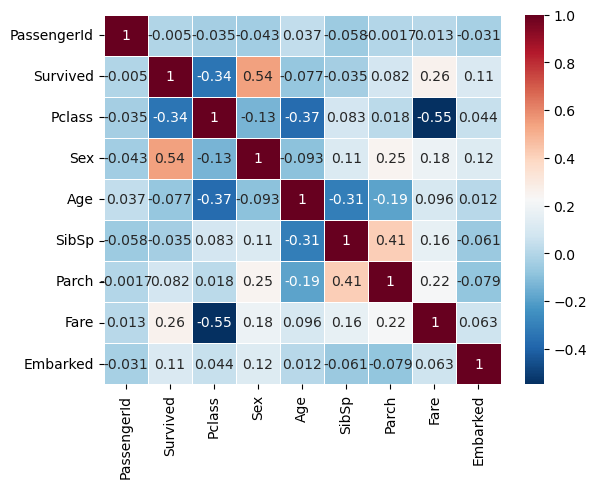

In [151]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

In [152]:
# We are trying to predict Age using imputation via regression.
# There are quite a few negative correlations with respect to Age.
# Create a new DF that only has cases that aren't missing age.

# First, extract the data that has all columns filled in with data and use only the relevant columns
age_pred_df = train_data.dropna(axis=0)
age_pred_df = age_pred_df.drop(['Survived'], axis=1)
age_pred_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,38.0,1,0,71.2833,2.0
2,3,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,35.0,1,0,53.1000,1.0
4,5,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
885,886,3,1,39.0,0,5,29.1250,3.0
886,887,2,0,27.0,0,0,13.0000,1.0
887,888,1,1,19.0,0,0,30.0000,1.0
889,890,1,0,26.0,0,0,30.0000,2.0


In [153]:
# Next, extract the rows from the original data that do not have values for Age
# These will be used for prediction later on
no_age_pred_df = train_data[train_data['Age'].isna()]
no_age_pred_df = no_age_pred_df.drop(['Survived', 'Age'], axis=1)
no_age_pred_df

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
5,6,3,0,0,0,8.4583,3.0
17,18,2,0,0,0,13.0000,1.0
19,20,3,1,0,0,7.2250,2.0
26,27,3,0,0,0,7.2250,2.0
28,29,3,1,0,0,7.8792,3.0
...,...,...,...,...,...,...,...
859,860,3,0,0,0,7.2292,2.0
863,864,3,1,8,2,69.5500,1.0
868,869,3,0,0,0,9.5000,1.0
878,879,3,0,0,0,7.8958,1.0


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create train/test split using the intact data
X_age = age_pred_df.drop(['Age', 'PassengerId'], axis=1)
Y_age = age_pred_df['Age']

X_train_age, X_test_age, Y_train_age, Y_test_age = train_test_split(X_age, Y_age, test_size=0.25, random_state=42) 

In [155]:
X_train_age

,Pclass,Sex,SibSp,Parch,Fare,Embarked
703,3,0,0,0,7.7417,3.0
462,1,0,0,0,38.5000,1.0
858,3,1,0,3,19.2583,2.0
429,3,0,0,0,8.0500,1.0
811,3,0,0,0,24.1500,1.0
...,...,...,...,...,...,...
93,3,0,1,2,20.5750,1.0
135,2,0,0,0,15.0458,2.0
338,3,0,0,0,8.0500,1.0
549,2,0,1,1,36.7500,1.0


In [156]:
# Train the model and obtain the prediction results
age_model = LinearRegression().fit(X_train_age, Y_train_age)

age_preds = age_model.predict(no_age_pred_df.drop('PassengerId', axis=1))

In [157]:
# Now that we have the list of age predictions we can popoulate the missing values
no_age_pred_df['Age'] = age_preds

# As a last resort, change any negative values to the average age
no_age_pred_df.loc[no_age_pred_df['Age'] < 0, 'Age'] = avg_age
no_age_pred_df

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
5,6,3,0,0,0,8.4583,3.0,27.197124
17,18,2,0,0,0,13.0000,1.0,35.577437
19,20,3,1,0,0,7.2250,2.0,23.778724
26,27,3,0,0,0,7.2250,2.0,28.130293
28,29,3,1,0,0,7.8792,3.0,22.850808
...,...,...,...,...,...,...,...,...
859,860,3,0,0,0,7.2292,2.0,28.130255
863,864,3,1,8,2,69.5500,1.0,29.699118
868,869,3,0,0,0,9.5000,1.0,29.031640
878,879,3,0,0,0,7.8958,1.0,29.046190


In [158]:
# Combine the datasets into one
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId']
no_age_pred_df = no_age_pred_df[cols]
combined_data = pd.concat([no_age_pred_df, age_pred_df])
combined_data = combined_data.sort_values(by=['PassengerId'])
combined_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
0,3,0,22.000000,1,0,7.2500,1.0,1
1,1,1,38.000000,1,0,71.2833,2.0,2
2,3,1,26.000000,0,0,7.9250,1.0,3
3,1,1,35.000000,1,0,53.1000,1.0,4
4,3,0,35.000000,0,0,8.0500,1.0,5
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,1.0,887
887,1,1,19.000000,0,0,30.0000,1.0,888
888,3,1,19.286601,1,2,23.4500,1.0,889
889,1,0,26.000000,0,0,30.0000,2.0,890


In [159]:
# Finally, split the combined + cleaned data into X and y (data and labels)
# Remove the items that do not contain values for "Embarked" that we found earlier and sort the data so it matches up correctly
X = combined_data.drop('PassengerId', axis=1)

for row in items_to_remove:
    y = y[y.PassengerId != row]
    
y = y.sort_values(by='PassengerId')

y = y.drop('PassengerId', axis=1)

y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Test Preprocessing

In [160]:
# Do the same for the test data
test_data = pd.read_csv('test.csv')
test_data.describe()
avg_test_fare = test_data['Fare'].mean()

In [161]:
# Change categorical to numeric
test_data['Embarked'] = test_data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
test_data['Sex'] = test_data['Sex'].replace(['female', 'male'], [1,0])

# Check for N/A rows, drop useless columns, extract items that don't have age
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [162]:
# Separate N/A data from Non-N/A data
# Fill in the one missing value for 'Fare' with average fare price
test_data['Fare'] = test_data['Fare'].fillna(avg_test_fare)

# Drop useless columns + separate NA values
test_data = test_data.drop(['Cabin', 'Name', 'Ticket'], axis=1)
test_age = test_data.dropna()
test_no_age = test_data[test_data['Age'].isna()]
test_no_age = test_no_age.drop(['Age'], axis=1)

# Predict ages for missing data points
test_no_age_preds = age_model.predict(test_no_age.drop('PassengerId', axis=1))
test_no_age['Age'] = test_no_age_preds
test_no_age.loc[test_no_age['Age'] < 0, 'Age'] = avg_age

# Combine data together into one DF
X_test = pd.concat([test_age, test_no_age])

In [163]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.500000,0,0,7.8292,3
1,893,3,1,47.000000,1,0,7.0000,1
2,894,2,0,62.000000,0,0,9.6875,3
3,895,3,0,27.000000,0,0,8.6625,1
4,896,3,1,22.000000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
408,1300,3,1,22.852245,0,0,7.7208,3
410,1302,3,1,22.851980,0,0,7.7500,3
413,1305,3,0,29.044792,0,0,8.0500,1
416,1308,3,0,29.044792,0,0,8.0500,1


# Modelling 

## Decision Tree

In [164]:
import csv
from sklearn import tree
# Decision Tree
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(X, y)

In [165]:
y_pred_tree = tree_classifier.predict(X_test.drop('PassengerId', axis=1))
y_pred_tree_ids = list(X_test['PassengerId'])

In [166]:
# Write the results to a CSV file for submission
num_items = len(y_pred_tree)
fields = ['PassengerId', 'Survived']
filename = 'decision_tree_preds.csv'
rows = []

for x in range(num_items):
    curr_id = y_pred_tree_ids[x]
    curr_pred = y_pred_tree[x]
    curr_row = [curr_id, curr_pred]
    rows.append(curr_row)

with open(filename, 'w', newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)
    csvfile.close()

In [ ]:
# The model doesn't perform super well - score was 0.71 accuracy. Let's try different models and compare.